#### Raw data analysis

In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import random

In [2]:
MICCAI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/miccai2016/'

Random selection of 3 slices for each image

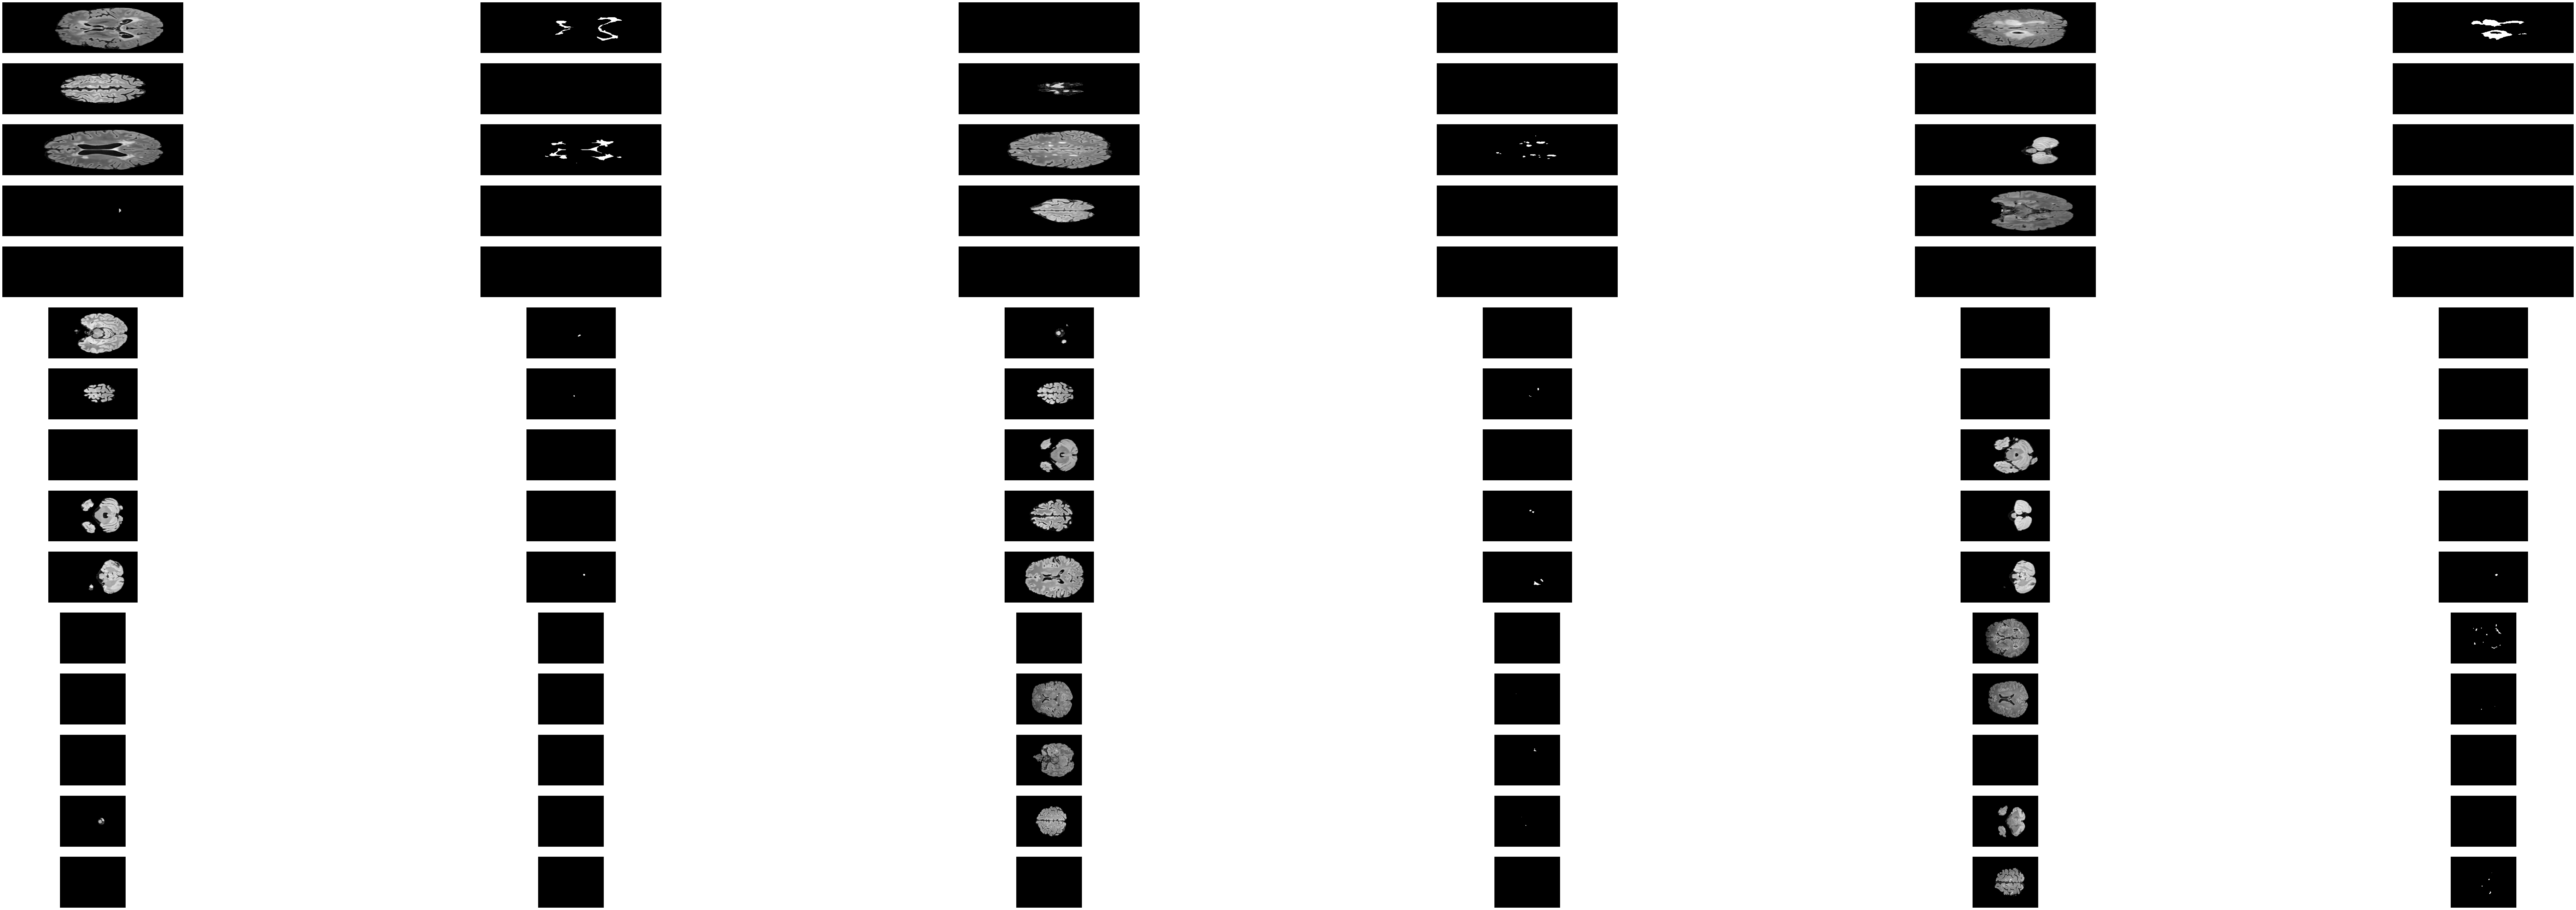

In [3]:
fig = plt.figure(figsize=(150, 50))

for i in range(15):
    img_name = MICCAI_PATH+'preprocessed/s'+str(i+1)+'/FLAIR_preprocessed.nii'
    msk_name = MICCAI_PATH+'unprocessed/s'+str(i+1)+'/Consensus.nii'
    img_np = nib.load(img_name).get_fdata()
    msk_np = nib.load(msk_name).get_fdata()
    
    # 50 is a small offset to avoid showing the extremes of the 3D image
    k1 = random.randint(50, img_np.shape[2]-50)
    k2 = random.randint(50, img_np.shape[2]-50)
    k3 = random.randint(50, img_np.shape[2]-50)

    fig.add_subplot(15, 6, i*6+1)
    plt.imshow(img_np[:,:,k1], cmap='gray')
    plt.axis('off')
    
    fig.add_subplot(15, 6, i*6+2)
    plt.imshow(msk_np[:,:,k1], cmap='gray')
    plt.axis('off')

    fig.add_subplot(15, 6, i*6+3)
    plt.imshow(img_np[:,:,k2], cmap='gray')
    plt.axis('off')

    fig.add_subplot(15, 6, i*6+4)
    plt.imshow(msk_np[:,:,k2], cmap='gray')
    plt.axis('off')

    fig.add_subplot(15, 6, i*6+5)
    plt.imshow(img_np[:,:,k3], cmap='gray')
    plt.axis('off')

    fig.add_subplot(15, 6, i*6+6)
    plt.imshow(msk_np[:,:,k3], cmap='gray')
    plt.axis('off')


Selection by hand to display image and mask of a certain slice of a certain image

In [4]:
# These are some good slices! (one for each image)
# slices = [350,350,350,350,300,180,180,180,140,160,220,220,250,250,240]

img_idx = 3
slice_idx = 350

In [5]:
img_name = 'preprocessed/s'+str(img_idx+1)+'/FLAIR_preprocessed.nii'
msk_name =  'unprocessed/s'+str(img_idx+1)+'/Consensus.nii'
img_np = nib.load(MICCAI_PATH+img_name).get_fdata()
msk_np = nib.load(MICCAI_PATH+msk_name).get_fdata()

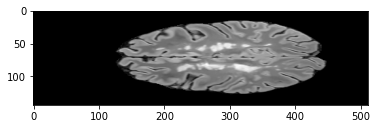

In [6]:
plt.imshow(img_np[:,:,slice_idx], cmap="gray")

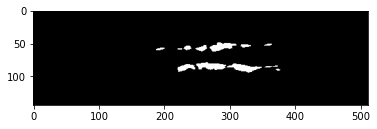

In [7]:
plt.imshow(msk_np[:,:,slice_idx], cmap="gray")

#### MRIs resize

In [4]:
import numpy   as np
import nibabel as nib
import matplotlib.pyplot as plt
import skimage.transform as skTrans

In [5]:
MICCAI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/miccai2016/'

Random selection of 3 slices for each image

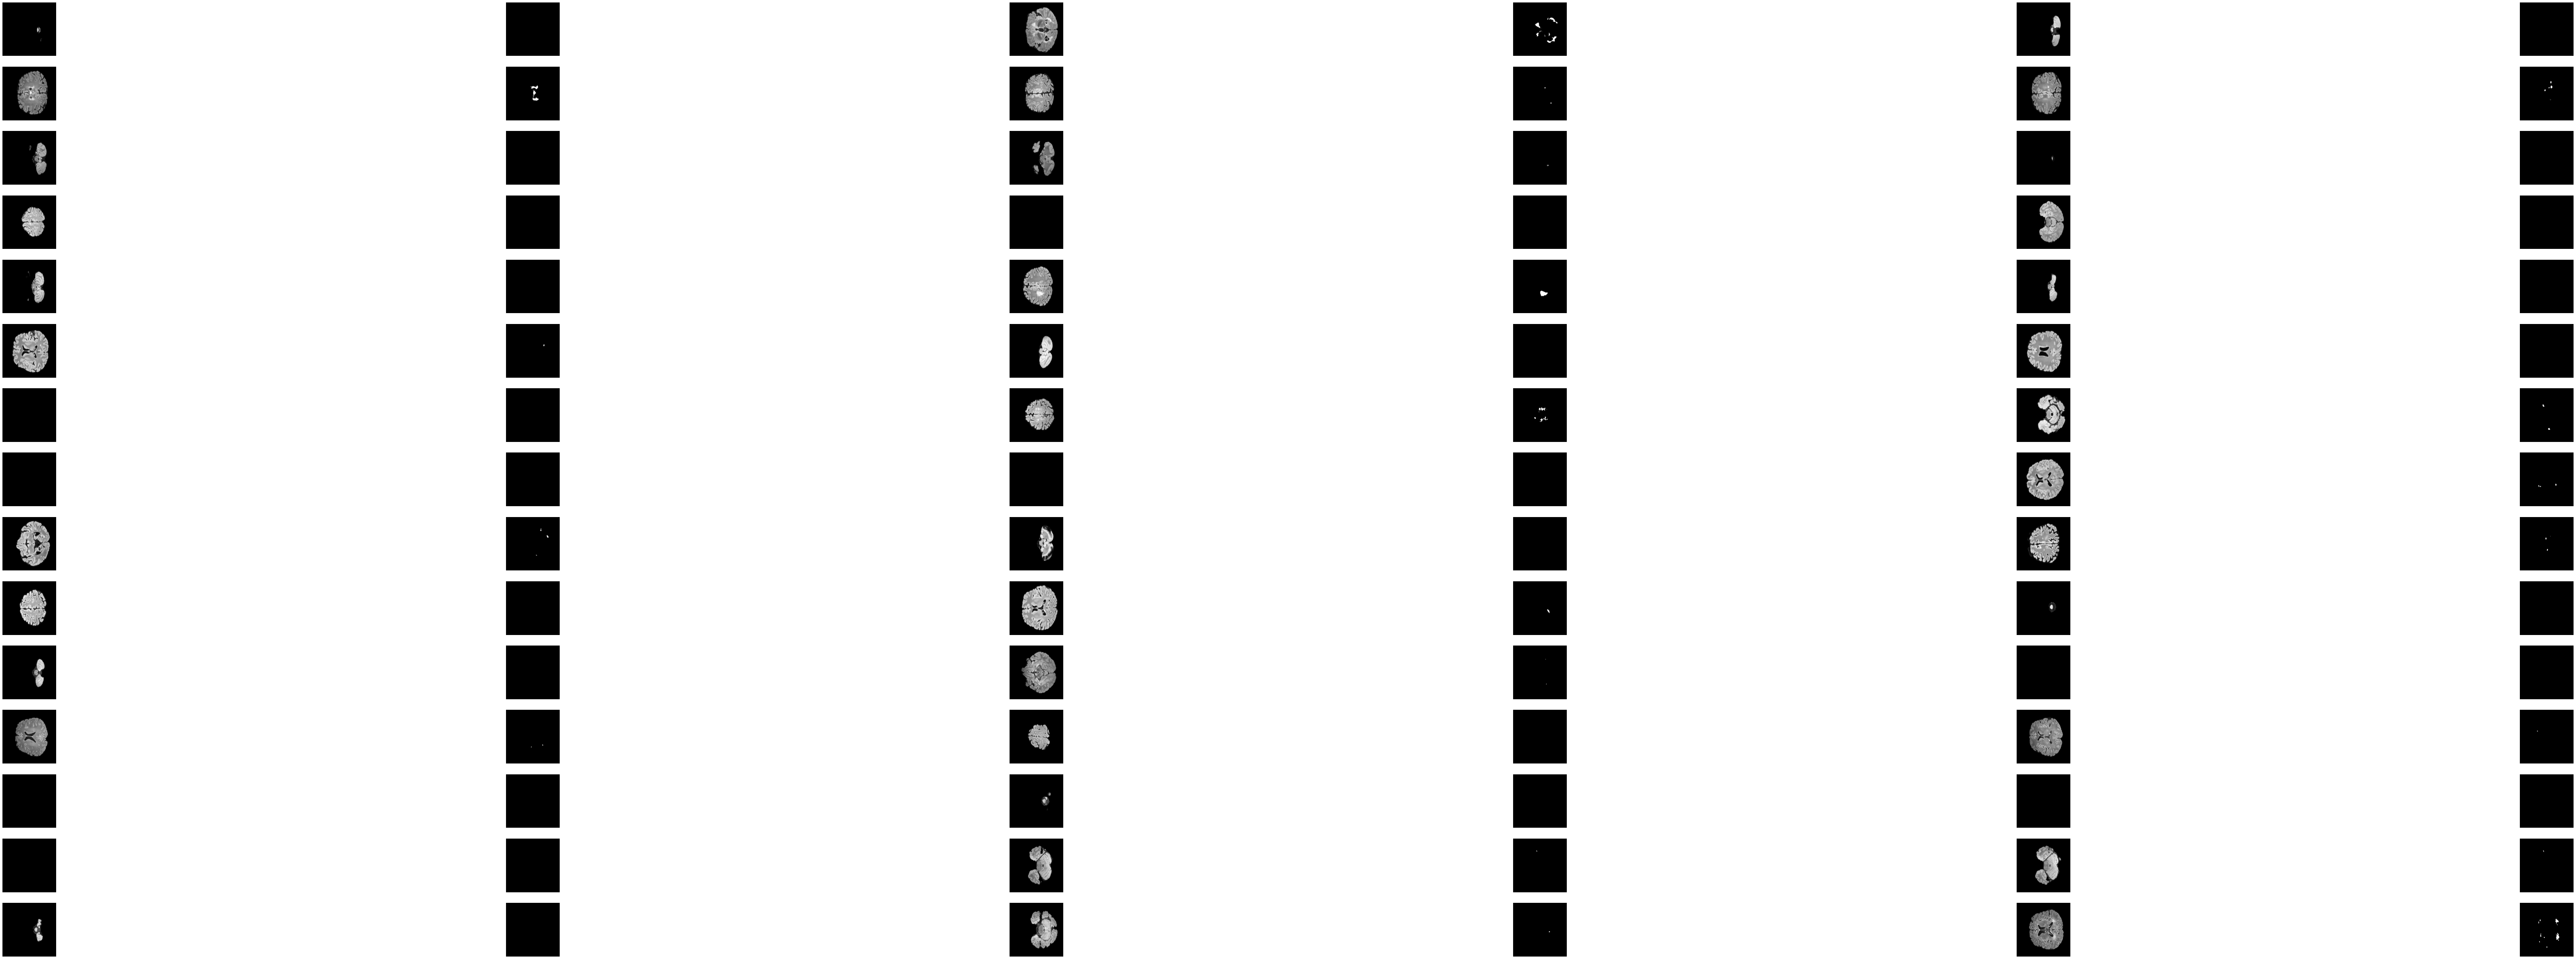

In [10]:
fig = plt.figure(figsize=(150, 50))

for i in range(15):
    img_name = MICCAI_PATH+'preprocessed/s'+str(i+1)+'/FLAIR_preprocessed.nii'
    msk_name = MICCAI_PATH+'unprocessed/s'+str(i+1)+'/Consensus.nii'
    img_np = nib.load(img_name).get_fdata()
    msk_np = nib.load(msk_name).get_fdata()
    
    # Images resizing!
    img_np = skTrans.resize(img_np, (256,256,256), order=1, preserve_range=True)
    msk_np = skTrans.resize(msk_np, (256,256,256), order=1, preserve_range=True)
    
    # 50 is a small offset to avoid showing the extremes of the 3D image
    k1 = random.randint(50, img_np.shape[2]-50)
    k2 = random.randint(50, img_np.shape[2]-50)
    k3 = random.randint(50, img_np.shape[2]-50)

    fig.add_subplot(15, 6, i*6+1)
    plt.imshow(img_np[:,:,k1], cmap='gray')
    plt.axis('off')
    
    fig.add_subplot(15, 6, i*6+2)
    plt.imshow(msk_np[:,:,k1], cmap='gray')
    plt.axis('off')

    fig.add_subplot(15, 6, i*6+3)
    plt.imshow(img_np[:,:,k2], cmap='gray')
    plt.axis('off')

    fig.add_subplot(15, 6, i*6+4)
    plt.imshow(msk_np[:,:,k2], cmap='gray')
    plt.axis('off')

    fig.add_subplot(15, 6, i*6+5)
    plt.imshow(img_np[:,:,k3], cmap='gray')
    plt.axis('off')

    fig.add_subplot(15, 6, i*6+6)
    plt.imshow(msk_np[:,:,k3], cmap='gray')
    plt.axis('off')

Selection by hand to display image and mask of a certain slice of a certain image

In [32]:
img_idx = 13
slice_idx = 175

In [33]:
img_name = 'preprocessed/s'+str(img_idx+1)+'/FLAIR_preprocessed.nii'
msk_name =  'unprocessed/s'+str(img_idx+1)+'/Consensus.nii'
img_np = nib.load(MICCAI_PATH+img_name).get_fdata()
msk_np = nib.load(MICCAI_PATH+msk_name).get_fdata()

# Images resizing!
img_np = skTrans.resize(img_np, (256,256,256), order=1, preserve_range=True)
msk_np = skTrans.resize(msk_np, (256,256,256), order=1, preserve_range=True)

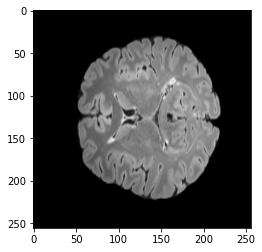

In [34]:
plt.imshow(img_np[:,:,slice_idx], cmap="gray")

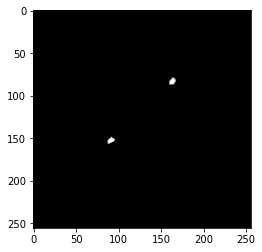

In [35]:
plt.imshow(msk_np[:,:,slice_idx], cmap="gray")

#### Dice metrics for images

In [1]:
import numpy as np
from PIL import Image

In [ ]:
img_idx = 687

In [ ]:
img = Image.open("validation_images/ts"+str(img_idx)+"/ts"+str(img_idx)+"_e18_pred.jpg")

In [ ]:
img_np = np.array(img)[:,:,0]

In [ ]:
msk = Image.open("validation_images/ts"+str(img_idx)+"/ts"+str(img_idx)+"_mask.jpg")

In [ ]:
msk_np = np.array(msk)[:,:,0]

In [ ]:
img_bool = (img_np / 255) > 0.5

In [ ]:
msk_bool = (msk_np / 255).astype(bool)

In [ ]:
2*np.sum(np.logical_and(img_bool, msk_bool))/(np.sum(img_bool)+np.sum(msk_bool))

#### Dice metric computation over tensors

In [2]:
import numpy as np
import pyeddl.eddl as eddl
from pyeddl.tensor import Tensor

In [1]:
MICCAI_PATH = '/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/miccai2016/'

In [3]:
ts_x = Tensor.load(MICCAI_PATH + "bin/miccai_tsX_oriented.bin")
ts_y = Tensor.load(MICCAI_PATH + "bin/miccai_tsY_oriented.bin")

In [5]:
tensor_y = ts_y.select(["175"])

In [10]:
tensor_y.getdata()

1.0